In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#File to load
file = "Seasons_stats2.csv"

#Reading file and storing to dataframe
nba_data = pd.read_csv(file)

nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


**Adding Minutes/Game Calculation to the CSV**

In [194]:
#Dropping NA/NaN values throughout the CSV
#nba_data.dropna(how='any', inplace=True)

# Adding new calculated columns to data frame
# Minutes per game
nba_data['MPG'] = nba_data['MP'] / nba_data['G']

#nba_data['MPG'] = player_data['MPG'].map('{:.1f}'.format)

# Points per game
nba_data['PPG'] = nba_data['PTS'] / nba_data['G']
# Offensive rebounds per game
nba_data['ORBG'] = nba_data['ORB'] / nba_data['G']
# Assists per game
nba_data['APG'] = nba_data['AST'] / nba_data['G']
# Field Goal attempts per game
nba_data['FGAG'] = nba_data['FGA'] / nba_data['G']
# 3pointer made per game
nba_data['3PG'] = nba_data['3P'] / nba_data['G']


#Format columns
#stat_format = "{:,.1f}"
#perc_format = "{:,.2f}%"

#nba_data.style.format({'MPG': stat_format})



nba_data.head()









#DELETE BELOW THIS ROW


#Setting the G, MP, and GS columns equal to non-NA/NaN values only
#player_data = player_data[player_data['G'].notna()]
#player_data = player_data[player_data['MP'].notna()]
#player_data = player_data[player_data['GS'].notna()]

#Converting the G, MP columns to numberic dtype
#player_data['G'] = pd.to_numeric(player_data['G'])
#player_data['MP'] = pd.to_numeric(player_data['MP'])
#player_data['FGA'] = pd.to_numeric(player_data['FGA'])

#Making new variables for G, MP
#games = player_data['G']
#minutes = player_data['MP']
#FGA = player_data['FGA']

#Calculation for new column called Minutes/Game
#minutes_per_game = minutes/games
#FGA_per_game = FGA/games

# #Adding Minutes/Game column to the CSV, mapping the column, converting to numeric dtype, applying comparison statement
# player_data['Minutes/Game'] = minutes_per_game
# player_data['Minutes/Game'] = player_data['Minutes/Game'].map('{:.1f}'.format)
# player_data['Minutes/Game'] = pd.to_numeric(player_data['Minutes/Game'])
# player_data = player_data.loc[(player_data['Minutes/Game'] >= 20) & (player_data['G'] >= 30)]
# player_data['AST'] = pd.to_numeric(player_data['AST'])
# player_data['APG'] = player_data['AST'] / player_data['G']
# player_data['ORB'] = pd.to_numeric(player_data['ORB'])
# player_data['ORBG'] = player_data['ORB'] / player_data['G']
# player_data['3P'] = pd.to_numeric(player_data['3P'])
# player_data['3PG'] = player_data['3P'] / player_data['G']

# #Adding FGA/Game column to the dataframe
# player_data['FGA/Game'] = FGA_per_game
# player_data['FGA/Game'] = player_data['FGA/Game'].map('{:.1f}'.format)
# player_data['FGA/Game'] = pd.to_numeric(player_data['FGA/Game'])



,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,MPG,PPG,ORBG,APG,FGAG,3PG
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,217.0,458.0,NaN,7.269841,NaN,2.793651,8.190476,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,99.0,279.0,NaN,5.693878,NaN,2.224490,5.591837,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,192.0,438.0,NaN,6.537313,NaN,2.089552,7.447761,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,29.0,63.0,NaN,4.200000,NaN,1.333333,5.733333,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,27.0,59.0,NaN,4.538462,NaN,1.538462,6.307692,NaN


In [195]:
#Figuring out how many 'games played' we wnat to filer out

#Describe 'Games played column' gives us a starting point
nba_data['G'].describe()

count    24624.000000
mean        50.837110
std         26.496161
min          1.000000
25%         27.000000
50%         58.000000
75%         75.000000
max         88.000000
Name: G, dtype: float64

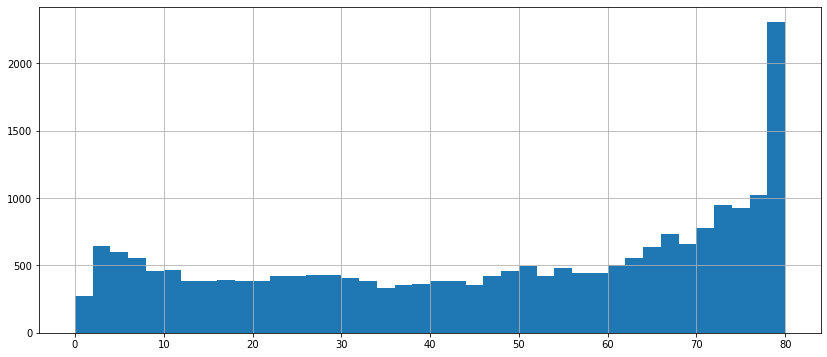

In [196]:
#PLotting histogram to gives us a visual of games played
bin_values = np.arange(start=0, stop = 82, step = 2)
nba_data['G'].hist(bins=bin_values, figsize=[14,6])
plt.show()

In [197]:
#Figuring out how many 'minutes played per game' we wnat to filer out

#Describe 'Games played column' gives us a starting point
nba_data['MPG'].describe()

count    24138.000000
mean        20.326823
std         10.378571
min          0.000000
25%         11.625000
50%         19.520396
75%         28.941346
max         48.525000
Name: MPG, dtype: float64

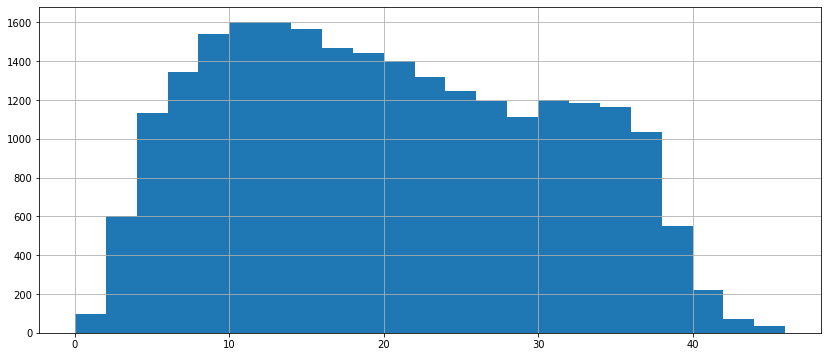

In [198]:
#Plotting histogram to gives us a visual of minutes per game
bin_values = np.arange(start=0, stop = 48, step = 2)
nba_data['MPG'].hist(bins=bin_values, figsize=[14,6])
plt.show()

In [199]:
#Filtering data to seasons after 1980, MPG(minutes per game) played, and G(total games played in the season) 
min_year = 1980
min_per_game = 10
min_gm_played = 10
player_data = nba_data[(nba_data['Year'] >= min_year) & (nba_data['MPG'] >= min_per_game) & (nba_data['G'] >= min_gm_played)]
player_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,MPG,PPG,ORBG,APG,FGAG,3PG
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,280.0,297.0,216.0,2034.0,38.329268,24.804878,2.317073,4.524390,16.865854,0.00
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,12.0,39.0,118.0,362.0,18.238806,5.402985,0.925373,1.298507,4.746269,0.00
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,55.0,218.0,237.0,1118.0,28.906667,14.906667,2.106667,4.293333,11.666667,0.00
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,10.0,242.0,218.0,1131.0,35.800000,14.137500,0.737500,8.387500,9.925000,0.05
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,15.0,27.0,66.0,86.0,21.538462,3.307692,1.115385,1.538462,2.307692,0.00


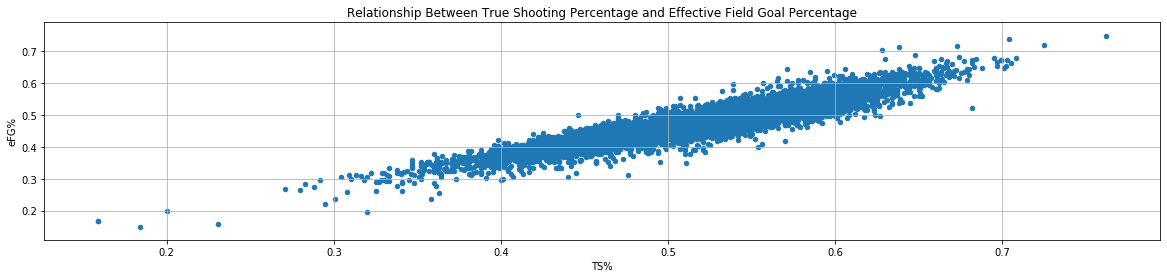

In [219]:
shooting_stats_relationship = player_data[['TS%', 'eFG%']]

player_3_eFG.plot(kind="scatter", x="TS%", y="eFG%", grid=True, figsize=(20,4),
                 title="Relationship Between True Shooting Percentage and Effective Field Goal Percentage")
plt.show()

In [200]:
grouped_by_year = player_data.groupby(['Year'])
ppg_year_median = grouped_by_year['PPG'].median()
TS_year_median = grouped_by_year['TS%'].median()
EFG_year_median = grouped_by_year['eFG%'].median()
APG_year_median = grouped_by_year['APG'].median()
ORBG_year_median = grouped_by_year['ORBG'].median()
Three_year_median = grouped_by_year['3PG'].median()

median_df = pd.DataFrame({'Points Per Game median': ppg_year_median,
                          'True Shooting median': TS_year_median,
                          'Effective Field Goal median': EFG_year_median,
                          'Assists Per Game median': APG_year_median,
                          'Offensive Rebounds Per Game median': ORBG_year_median,
                          '3 Pointers Made Per Game median': TreyPG_year_median
                         })

median_df.head(38)

,Points Per Game median,True Shooting median,Effective Field Goal median,Assists Per Game median,Offensive Rebounds Per Game median,3 Pointers Made Per Game median
Year,,,,,,
1980.0,9.627178,0.5240,0.4790,2.134078,1.293777,0.013158
1981.0,9.363636,0.5200,0.4790,2.208333,1.263158,0.000000
1982.0,9.509654,0.5270,0.4850,1.765915,1.227791,0.012195
1983.0,8.792208,0.5190,0.4770,1.914634,1.260274,0.000000
1984.0,9.012195,0.5285,0.4815,2.120491,1.169048,0.013794
1985.0,9.254393,0.5345,0.4890,1.913872,1.196046,0.012500
1986.0,9.000000,0.5250,0.4810,1.909091,1.115385,0.022222
1987.0,9.176471,0.5220,0.4760,1.841463,1.175439,0.015385
1988.0,8.848279,0.5290,0.4800,1.750000,1.147385,0.031054


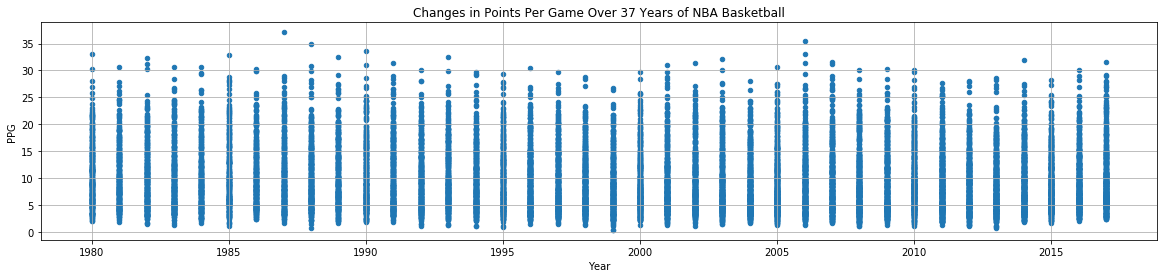

In [201]:
PPG_distribution = player_data[['PPG', 'Year']]

PPG_distribution.plot(kind="scatter", x="Year", y="PPG", grid=True, figsize=(20,4),
                 title="Changes in Points Per Game Over 37 Years of NBA Basketball")
plt.show()

In [202]:
ppg_total_median = player_data['PPG'].median()
TS_total_median = player_data['TS%'].median()
EFG_total_median = player_data['eFG%'].median()
APG_total_median = player_data['APG'].median()
ORBG_total_median = player_data['ORBG'].median()
ThreePG_total_median = player_data['3PG'].median()

allyears_df = pd.DataFrame({'All Years Points Per Game median': [ppg_total_median],
                          'All Years True Shooting median': [TS_total_median],
                          'All Years Effective Field Goal median': [EFG_total_median],
                          'All Years Assists Per Game median': [APG_total_median],
                          'All Years Offensive Rebounds Per Game median': [ORBG_total_median],
                          'All Years 3 Pointers Made Per Game median': [ThreePG_total_median]
                          })

allyears_df.head(38)

,All Years Points Per Game median,All Years True Shooting median,All Years Effective Field Goal median,All Years Assists Per Game median,All Years Offensive Rebounds Per Game median,All Years 3 Pointers Made Per Game median
0,8.441558,0.525,0.482,1.66,0.986754,0.141026


In [203]:
player_ppg_weight = ((player_data['PPG'] - 8.441558)/8.441558)
player_ts_weight = ((player_data['TS%'] - 0.525) /0.525)
player_efg_weight = ((player_data['eFG%'] - 0.482)/0.482)
player_assist_weight = ((player_data['APG'] - 1.66)/1.66)
player_opg_weight = ((player_data['ORBG'] - 0.986754)/0.986754)
player_3pg_weight = ((player_data['3PG'] - 0.141026)/0.141026)

player_total_weight = (player_ppg_weight + player_ts_weight + player_efg_weight + player_assist_weight + 
                       player_opg_weight + player_3pg_weight)


weight_df = pd.DataFrame({#'Player Name': [Player],
                          #'Season': [Year],
                          'Weight': [player_total_weight]
                          })

weight_df.head

#This is my rough attempt at weighting. We can discuss if we want to keep it or not.  





<bound method NDFrame.head of                                               Weight
0  5727     4.482392
5728    -1.668667
5729     2...>

# Offensive Stat 1 - Player Scoring (Points/FG%)

In [204]:
#Creating a series from the CSV with Year, Player, PTS, and our new column Minutes/Game
player_points = player_data[['Year','Player', 'PTS', 'FG%','TS%','PPG', 'G', 'MPG']]

#Converting the PTS column to a numberica dtype
#player_points['PTS'] = pd.to_numeric(player_points['PTS'])

#Sorting and displaying to check if the Minutes/Game column is calculating correctly
player_points = player_points.sort_values(by='PPG', ascending=False)
top_player_points = player_points.head(40)
top_player_points

,Year,Player,PTS,FG%,TS%,PPG,G,MPG
8469,1987.0,Michael Jordan*,3041.0,0.482,0.562,37.085366,82.0,40.012195
17742,2006.0,Kobe Bryant,2832.0,0.450,0.559,35.400000,80.0,40.962500
8869,1988.0,Michael Jordan*,2868.0,0.535,0.603,34.975610,82.0,40.378049
9747,1990.0,Michael Jordan*,2753.0,0.526,0.606,33.573171,82.0,38.987805
5848,1980.0,George Gervin*,2585.0,0.528,0.587,33.141026,78.0,37.615385
17904,2006.0,Allen Iverson*,2377.0,0.447,0.543,33.013889,72.0,43.097222
7722,1985.0,Bernard King*,1809.0,0.530,0.585,32.890909,55.0,37.509091
11106,1993.0,Michael Jordan*,2541.0,0.495,0.564,32.576923,78.0,39.320513
9297,1989.0,Michael Jordan*,2633.0,0.538,0.614,32.506173,81.0,40.185185
6557,1982.0,George Gervin*,2551.0,0.500,0.562,32.291139,79.0,35.658228


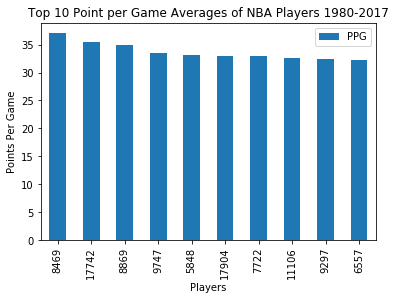

In [205]:
player_ppg = player_data[['Player', 'PPG']]
player_ppg = player_ppg.sort_values(by='PPG', ascending=False)
player_ppg_graph = player_ppg.head(10)
player_ppg_graph.plot(kind="bar")
plt.title("Top 10 Point per Game Averages of NBA Players 1980-2017")
plt.xlabel("Players")
plt.ylabel("Points Per Game")
plt.show()

Text(-20, 20, 'Michael Jordan')

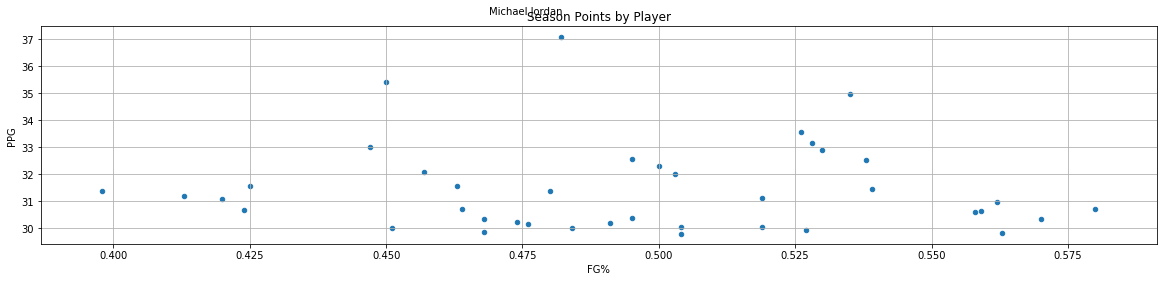

In [206]:
#Capomulin_Average_Tumor_Volume = Capomulin_df["Tumor Volume (mm3)"]
#Capomulin_Mouse_Weight = Capomulin_df["Weight (g)"]
# plt.scatter(Capomulin_Average_Tumor_Volume,Capomulin_Mouse_Weight)
# plt.xlabel("Tumor Volume (mm3)")
# plt.ylabel("Mouse Weight (g)")
# plt.show()

top_player_points.plot(kind="scatter", x="FG%", y="PPG", grid=True, figsize=(20,4),
                 title="Season Points by Player")
plt.annotate('Michael Jordan', xy=(0.486, 37.085366), xytext=(-20, 20), textcoords= 'offset points', ha='right', va='bottom')

#player_points.plt.scatter(x_axis, data, marker=“o”, facecolors=“red”, edgecolors=“black”, s=x_axis, alpha=0.75)

# Offensive Stat 2 - True Shooting Percentage

In [207]:
# Filting player shooting to players who took more than 10 shots per game
attempts_filter = player_data['FGAG'] >= 10
player_shooting_attempts = player_data[attempts_filter]
player_shooting_attempts = player_shooting_attempts[['Year','Player','TS%', 'FG%', 'FGA', 'G', 'FGAG']]

# #Converting the PTS column to a numberica dtype
# player_TS['TS%'] = pd.to_numeric(player_TS['TS%'])

# #Sorting and displaying top shooters by TS%
player_shooting_attempts = player_shooting_attempts.sort_values(by='TS%', ascending=False)
top_player_shooting = player_shooting_attempts.head(20)
top_player_shooting

,Year,Player,TS%,FG%,FGA,G,FGAG
6558,1982.0,Artis Gilmore*,0.702,0.652,837.0,82.0,10.207317
7660,1985.0,Artis Gilmore*,0.680,0.623,854.0,81.0,10.543210
23633,2016.0,Stephen Curry,0.669,0.504,1598.0,79.0,20.227848
6938,1983.0,Artis Gilmore*,0.668,0.626,888.0,82.0,10.829268
8699,1988.0,Charles Barkley*,0.665,0.587,1283.0,80.0,16.037500
6895,1983.0,Adrian Dantley*,0.661,0.580,402.0,22.0,18.272727
9564,1990.0,Charles Barkley*,0.661,0.600,1177.0,79.0,14.898734
21338,2012.0,James Harden,0.660,0.491,629.0,62.0,10.145161
8316,1987.0,Charles Barkley*,0.660,0.594,937.0,68.0,13.779412
8910,1988.0,Kevin McHale*,0.656,0.604,911.0,64.0,14.234375


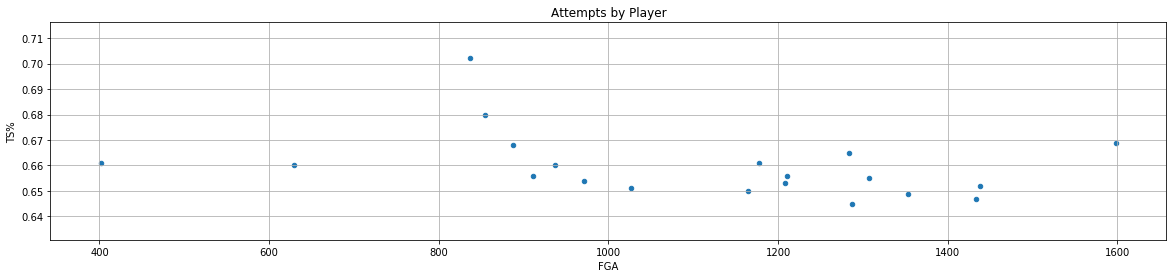

In [208]:
top_player_shooting.plot(kind="scatter", x="FGA", y="TS%", grid=True, figsize=(20,4),
                 title="Attempts by Player")

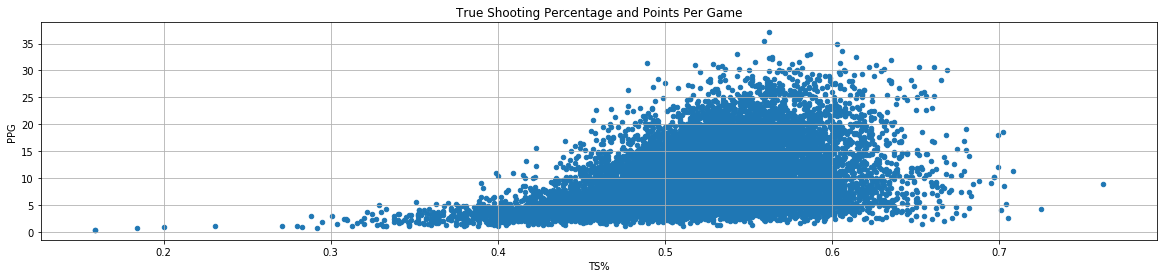

In [209]:
TS_Points = player_data[['PPG', 'TS%']]

TS_Points.plot(kind="scatter", x="TS%", y="PPG", grid=True, figsize=(20,4),
                 title="True Shooting Percentage and Points Per Game")
plt.show()

# Offensive Stat 3 - Effective Field Goal Percentage (excludes free throws)

In [210]:
#Creating a dataframe from the CSV with new effective field goal percentage with more than attempts per game
player_efg = player_data[attempts_filter]
player_efg = player_efg[['Year','Player', 'eFG%', 'G', 'PPG', 'FGA', 'FGAG']]

#Sorting players for eFG%
player_efg = player_efg.sort_values(by='eFG%', ascending=False)

player_efg.head(10)

# player_efg = player_data.loc[player_data['FGA/Game'] >= 10]
# player_efg['eFG%'] = pd.to_numeric(player_efg['eFG%'])
# player_efg = player_efg.sort_values(by='eFG%', ascending=False)
# player_efg = player_efg[['Year','Player', 'eFG%', 'G', 'FGA', 'FGA/Game']]
# player_efg.head(10)

,Year,Player,eFG%,G,PPG,FGA,FGAG
6558,1982.0,Artis Gilmore*,0.653,82.0,18.500000,837.0,10.207317
23633,2016.0,Stephen Curry,0.630,79.0,30.063291,1598.0,20.227848
6938,1983.0,Artis Gilmore*,0.626,82.0,18.036585,888.0,10.829268
7660,1985.0,Artis Gilmore*,0.623,81.0,19.111111,854.0,10.543210
18562,2007.0,Steve Nash,0.613,76.0,18.578947,971.0,12.776316
20167,2010.0,Dwight Howard,0.612,82.0,18.329268,834.0,10.170732
22548,2014.0,LeBron James,0.610,77.0,27.129870,1353.0,17.571429
19741,2009.0,Shaquille O'Neal*,0.609,75.0,17.773333,841.0,11.213333
24538,2017.0,Otto Porter,0.608,80.0,13.437500,803.0,10.037500
9564,1990.0,Charles Barkley*,0.608,79.0,25.177215,1177.0,14.898734


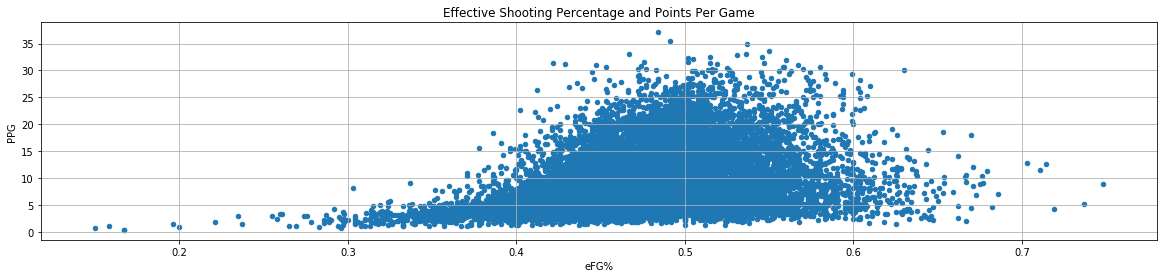

In [211]:
ES_Points = player_data[['PPG', 'eFG%']]

ES_Points.plot(kind="scatter", x="eFG%", y="PPG", grid=True, figsize=(20,4),
                 title="Effective Shooting Percentage and Points Per Game")
plt.show()

# Offensive Stat 4 - Assits Per Game Played

In [212]:
# Creating assists dataframe
player_apg = player_data[['Year','Player', 'APG', 'AST', 'G']]
player_apg = player_apg.sort_values(by='APG', ascending=False)
player_apg.head(10)



#player_apg['APG'] = player_apg['APG'].map('{:.1f}'.format)



,Year,Player,APG,AST,G
9923,1990.0,John Stockton*,14.538462,1134.0,78.0
10377,1991.0,John Stockton*,14.195122,1164.0,82.0
7857,1985.0,Isiah Thomas*,13.864198,1123.0,81.0
9018,1988.0,John Stockton*,13.756098,1128.0,82.0
10844,1992.0,John Stockton*,13.731707,1126.0,82.0
9461,1989.0,John Stockton*,13.634146,1118.0,82.0
7348,1984.0,Magic Johnson*,13.059701,875.0,67.0
9283,1989.0,Magic Johnson*,12.831169,988.0,77.0
21098,2011.0,Deron Williams,12.750000,153.0,12.0
8082,1986.0,Magic Johnson*,12.597222,907.0,72.0


# Offensive Stat 5 - Offensive Rebound Per Game Played

In [213]:
#Creating offensive rebound dataframe
player_orbg = player_data[['Year','Player', 'ORBG', 'ORB', 'G']]
player_orbg = player_orbg.sort_values(by='ORBG', ascending=False)
player_orbg.head(10)

,Year,Player,ORBG,ORB,G
5942,1980.0,Moses Malone*,6.987805,573.0,82.0
6672,1982.0,Moses Malone*,6.888889,558.0,81.0
13941,1998.0,Jayson Williams,6.815385,443.0,65.0
10801,1992.0,Dennis Rodman*,6.378049,523.0,82.0
6298,1981.0,Moses Malone*,5.925000,474.0,80.0
11248,1993.0,Dennis Rodman*,5.919355,367.0,62.0
13392,1997.0,Jayson Williams,5.902439,242.0,41.0
13278,1997.0,Dennis Rodman*,5.818182,320.0,55.0
8316,1987.0,Charles Barkley*,5.735294,390.0,68.0
11737,1994.0,Dennis Rodman*,5.734177,453.0,79.0


# Offensive Stat 6 - Three Pointers Made Per Game Played

In [214]:
player_3pg = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%']]
player_3pg = player_3pg.sort_values(by='3PG', ascending=False)
player_3pg.head(10)

,Year,Player,3PG,3P,3PA,3P%,PPG,G,TS%
23633,2016.0,Stephen Curry,5.088608,402.0,886.0,0.454,30.063291,79.0,0.669
24216,2017.0,Stephen Curry,4.101266,324.0,789.0,0.411,25.303797,79.0,0.624
23000,2015.0,Stephen Curry,3.575000,286.0,646.0,0.443,23.750000,80.0,0.638
21798,2013.0,Stephen Curry,3.487179,272.0,600.0,0.453,22.897436,78.0,0.589
24033,2016.0,Klay Thompson,3.450000,276.0,650.0,0.425,22.137500,80.0,0.597
17665,2006.0,Ray Allen,3.448718,269.0,653.0,0.412,25.064103,78.0,0.590
24617,2017.0,Klay Thompson,3.435897,268.0,647.0,0.414,22.333333,78.0,0.592
22402,2014.0,Stephen Curry,3.346154,261.0,615.0,0.424,24.012821,78.0,0.610
15512,2002.0,Ray Allen,3.318841,229.0,528.0,0.434,21.782609,69.0,0.598
24290,2017.0,Eric Gordon,3.280000,246.0,661.0,0.372,16.226667,75.0,0.557


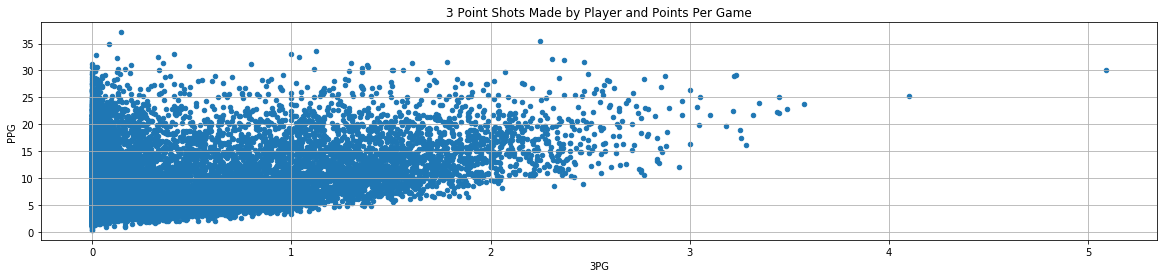

In [215]:
player_3pg.plot(kind="scatter", x="3PG", y="PPG", grid=True, figsize=(20,4),
                 title="3 Point Shots Made by Player and Points Per Game")

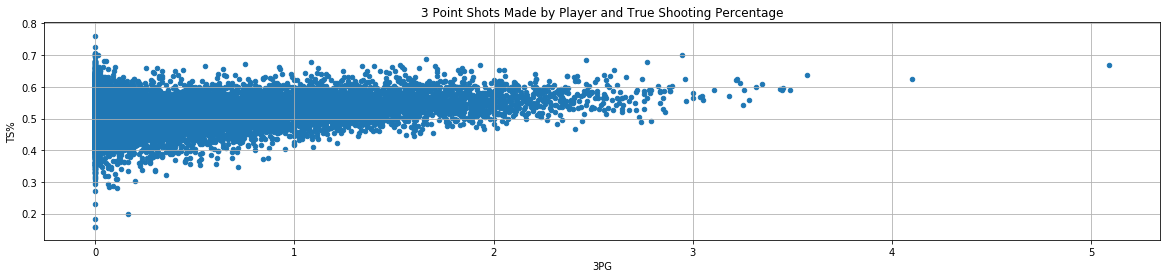

True Shooting Percentage mean is 0.5220007597734478%
True Shooting Percentage median is 0.525%
True Shooting Percentage standard deviation is 0.051842539393510044


In [216]:
player_3_TS = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%', 'eFG%']]

TS_mean = player_data['TS%'].mean()
TS_median = player_data['TS%'].median()
TS_SD = player_data['TS%'].std()

player_3_TS.plot(kind="scatter", x="3PG", y="TS%", grid=True, figsize=(20,4),
                 title="3 Point Shots Made by Player and True Shooting Percentage")

#plt.annotate(TS_median,(0.52,5.5),fontsize=15,color='red')
plt.show()
print(f"True Shooting Percentage mean is {TS_mean}%")
print(f"True Shooting Percentage median is {TS_median}%")
print(f"True Shooting Percentage standard deviation is {TS_SD}")

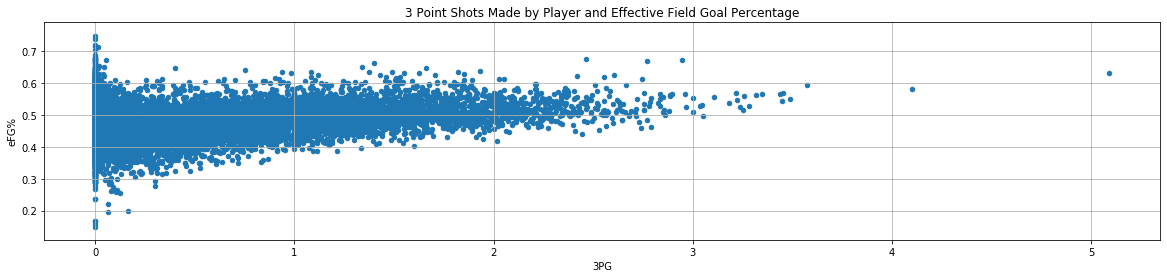

In [217]:
player_3_eFG = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%', 'eFG%']]

player_3_eFG.plot(kind="scatter", x="3PG", y="eFG%", grid=True, figsize=(20,4),
                 title="3 Point Shots Made by Player and Effective Field Goal Percentage")
plt.show()